#### Importing Libraries, Loading Dataset and Data Summary


In [1066]:
# Importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [1067]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [1068]:
# Importing dataset
dataset = pd.read_csv('Churn_Last.csv')

In [1069]:
# Getting familiarized with the data 
# Row and columns

dataset.shape

(667, 6)

In [1070]:
# First five rows of data 

dataset.head(5)

,Account_length,Total_day_charge,Total_eve_charge,Total_night_charge,Total_intl_charge,Churn
0,117,31.37,29.89,9.71,2.35,False
1,65,21.95,19.42,9.40,3.43,True
2,161,56.59,27.01,7.23,1.46,True
3,111,18.77,11.67,8.53,2.08,False
4,49,20.28,18.28,8.04,3.00,False


In [1071]:
# Getting basic stats on the dataset

dataset.describe()

,Account_length,Total_day_charge,Total_eve_charge,Total_night_charge,Total_intl_charge
count,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,30.761769,17.285262,8.985907,2.764948
std,40.819480,9.436463,4.226160,2.239429,0.758167
min,1.000000,4.400000,4.090000,1.040000,0.000000
25%,76.000000,24.860000,14.540000,7.560000,2.320000
50%,102.000000,30.310000,17.310000,9.070000,2.840000
75%,128.000000,37.520000,20.095000,10.420000,3.255000
max,232.000000,56.830000,30.750000,16.550000,4.940000


In [1072]:
# Number of instances for Churn (YES or NO)

dataset.groupby("Churn").size()

Churn
False    572
True      95
dtype: int64

In [1073]:
# How many categorial and numerical datatypes are in the dataset
# TRUE & FALSE are Boolean operators with value 1 & 0 respectively 

categorical = dataset.select_dtypes(include=[object])
print("Categorical Columns:",categorical.shape[1])

numerical = dataset.select_dtypes(exclude=[object])
print("Numerical Columns:",numerical.shape[1])

Categorical Columns: 0
Numerical Columns: 6


In [1074]:
# Checking  if there are missing values 

dataset.isnull().any().any()

False

#### In this section we will start dividing the data into features and labels, then we will proceed to "enconde" the data so TRUE & FALSE values are represented by integers. We'll be selecting TEST and TRAIN data. Finally we will scale the data so the magnitue is uniform. COMMENT: For the first iteration with all the data I will not be scaling the data 

In [1075]:
# Selecting features and labels arrays using iloc

X = dataset.iloc[:, 0:5].values
y = dataset.iloc[:, 5].values

In [1076]:
# Labels before encoding

print(y)

[False  True  True False False False False  True False False False False
 False False  True False  True False False False False False False False
 False False False False False False False False False False False  True
 False False False False False  True False False False False False  True
 False False False False  True False False False  True False  True False
  True  True  True False False  True False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
  True False  True False  True False False False False False False False
 False  True  True False False False  True  True False False False False
 False False False  True False False False False False False False False
  True False  True False False False False False False False False False
 False False False False False False False False False False  True  True
 False False False False False False False  True Fa

In [1077]:
# Encoding 

le = LabelEncoder()
y = le.fit_transform(y)

In [1078]:
# Labels after encoding 

print(y)

[0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 

In [1079]:
# Selecting training and test data using sklearn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [1080]:
# Verifying the data is split correctly 80/20 
# If you divide the first number by the total records in this case 667 because it should give you .20 
# which represents the testing ratio of 80%

X_train.shape

(533, 5)

In [1081]:
# Scaling features 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1082]:
# X_train after scaling 

#print(X_train)

#### PLOTS! 

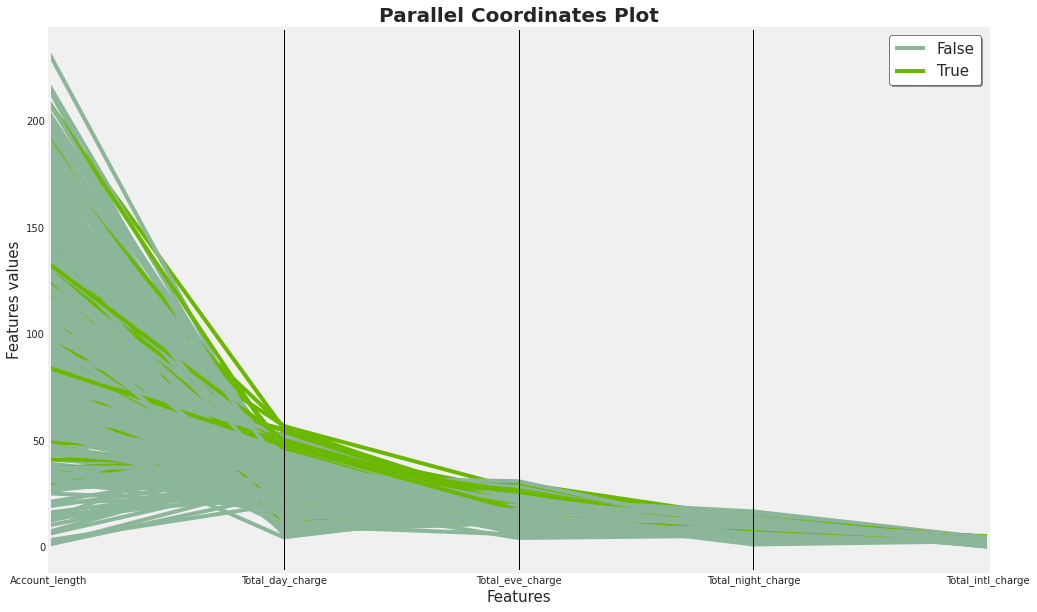

In [1083]:
# I: Parallel Coordinates Plot

from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset, "Churn")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

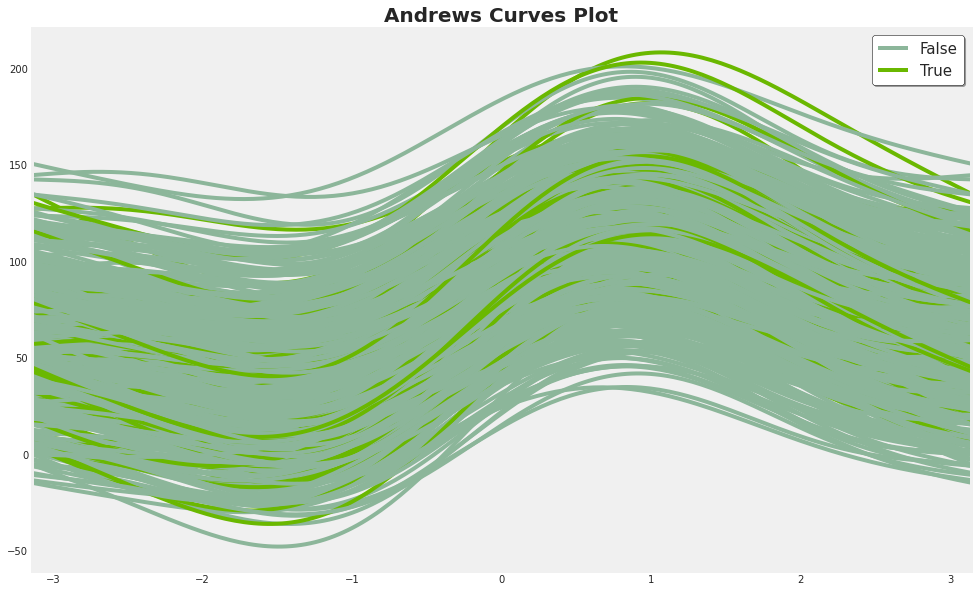

In [1084]:
# II: Andrews Curves 

from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(dataset, "Churn")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

<Figure size 432x288 with 0 Axes>

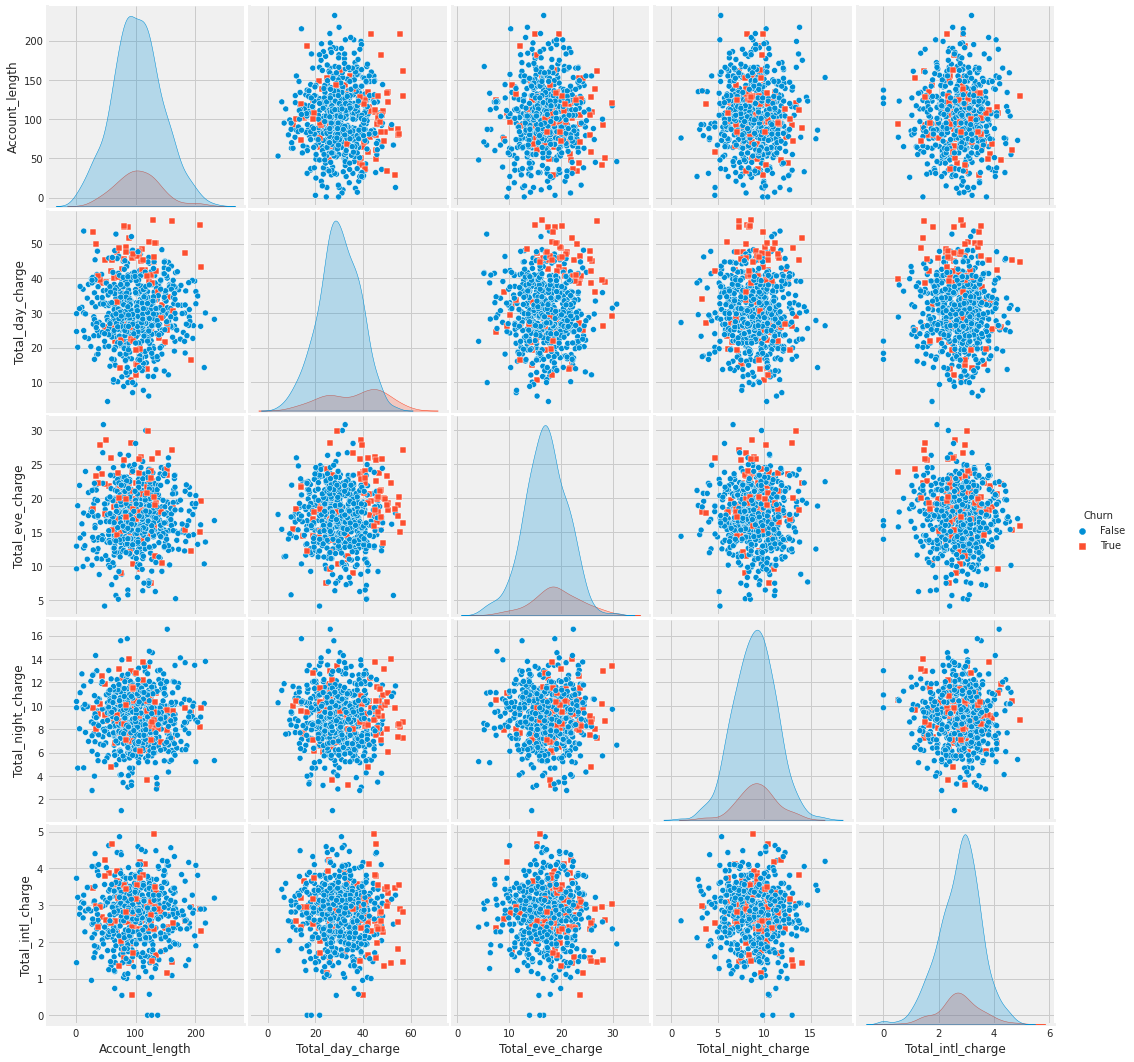

In [1085]:
# III: Pairplot
plt.figure()
sns.pairplot(dataset, hue = "Churn", height=3, markers=["o", "s"])
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

<Figure size 432x288 with 0 Axes>

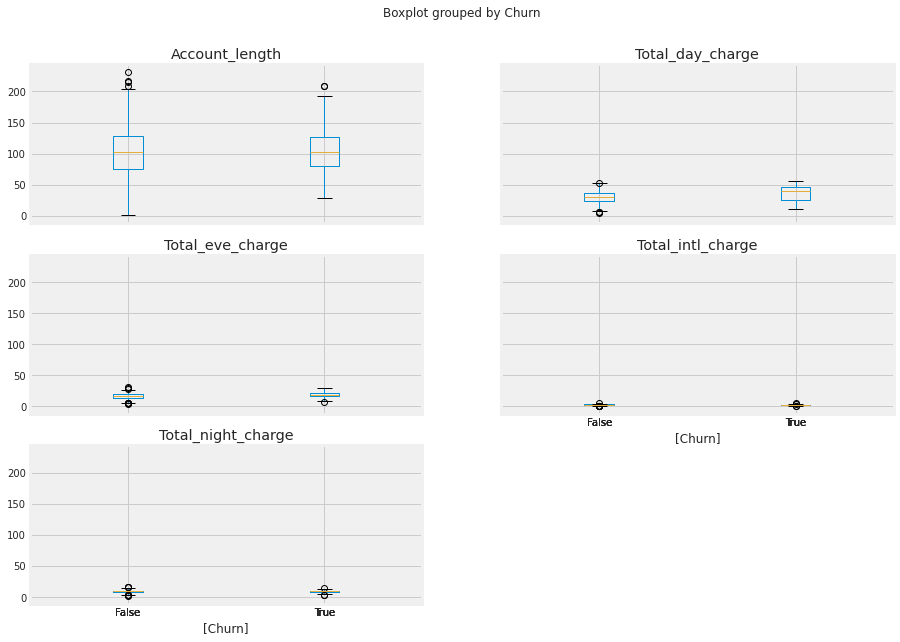

In [1086]:
# IV : Box Plot
plt.figure()
dataset.boxplot(by="Churn", figsize=(15, 10))
plt.show()

#### In this part we will use KNN to make predictions. K-Nearest Neighbors Algorithm uses distance to make classifications or predictions about the grouping of an individual data point. the 'k' value is arbitrary not given.

In [1089]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = n)
classifier = KNeighborsClassifier(n_neighbors=6)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [1090]:
# Model error. 
# Colums are FALSE (0) and TRUE (1) predictions.
# The top row represents the actual quantity of  FALSE(0) instances in the test dataset
# The bottown row represents the actual quantity of TRUE (1) instances in the test dataset 

confusion_matrix(y_test,y_pred)

array([[115,   0],
       [ 16,   3]])

In [1091]:
# Other method to visualize the error 

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,0,1,All
True,,,
0,115,0,115
1,16,3,19
All,131,3,134


In [1092]:
# Classification report
# Use this report in conjunction with the error or confusion matrix to validate the accuracy of the model 
# A high accuracy does not means that the model is performing optimally 

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93       115
           1       1.00      0.16      0.27        19

    accuracy                           0.88       134
   macro avg       0.94      0.58      0.60       134
weighted avg       0.90      0.88      0.84       134



In [1093]:
# Calculating model accuracy 

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 88.06 %.


#### In this section we are going to use 2 different methods to find the best 'k' or number of neighbors 

In [1094]:
# Method 1
# Validating parameters

# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

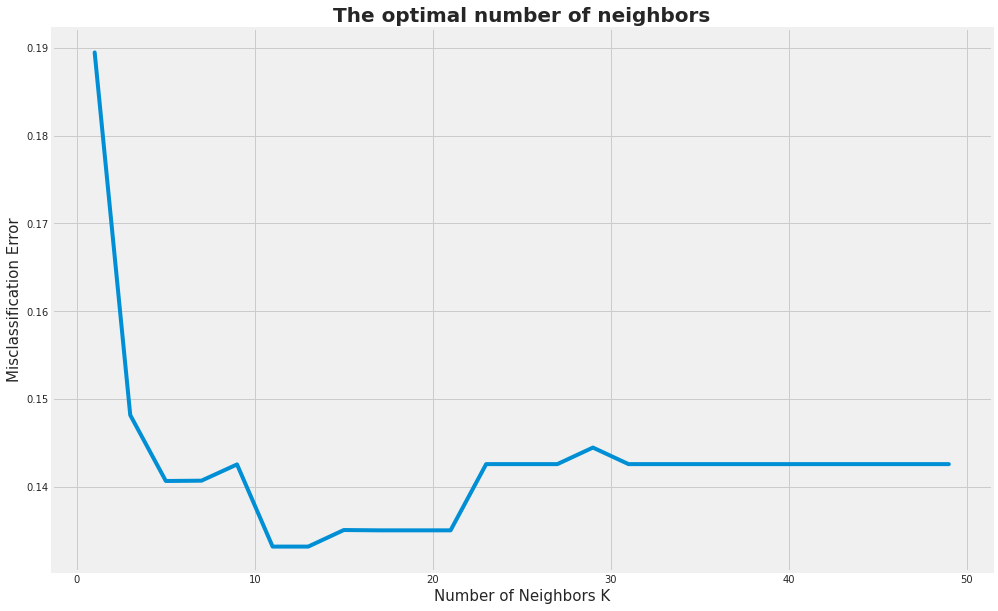

In [1095]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [1096]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 11.


In [1097]:
# Method 2

error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))


Text(0, 0.5, 'Mean Error')

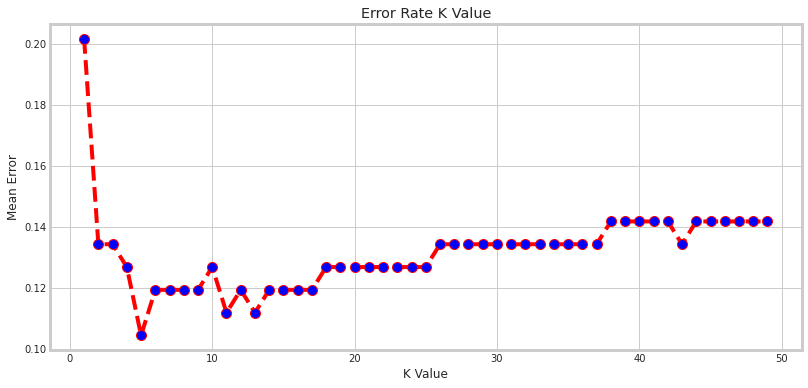

In [1098]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,50), error_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [1099]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [1102]:
#print the best score obtained during GridSearchCV
knn_cv.best_score_


0.86806194590955

In [1103]:
# and the optimal number of neighbors (note different techniques may identify different results for 'optimal number')
knn_cv.best_params_

{'n_neighbors': 5}

#### After changing k values with both k values suggested by method 1 and 2, method 2 with the value k=5 was more accurate than k=11 which decreased the accuracy of the model. 